<a href="https://colab.research.google.com/github/gsprabhashana/cloud-storage-app/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load dataset
df = pd.read_csv('housing.csv')
df.head()  # Display the first few rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with median (example)
df.fillna(df.median(), inplace=True)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


TypeError: Cannot convert [['NEAR BAY' 'NEAR BAY' 'NEAR BAY' ... 'INLAND' 'INLAND' 'INLAND']] to numeric

In [3]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with median for numeric columns only
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load dataset
df = pd.read_csv('housing.csv')
df.head()  # Display the first few rows

# Check for missing values
print(df.isnull().sum())

# Fill missing values with median for numeric columns only
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Example: Boxplot for detecting outliers in the 'price' column
# Check if 'price' is in the columns, if not, print available columns
if 'price' in df.columns:
    sns.boxplot(df['price'])
    plt.show()

    # Optionally, remove outliers beyond 3 standard deviations
    df = df[(np.abs(df['price'] - df['price'].mean()) <= (3 * df['price'].std()))]
else:
    print(f"'price' column not found. Available columns: {df.columns.tolist()}")

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
'price' column not found. Available columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
df = pd.read_csv('housing.csv')
df.head()  # Display the first few rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
# Check for missing values
print(df.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [10]:
# Display summary statistics
print(df.describe())


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

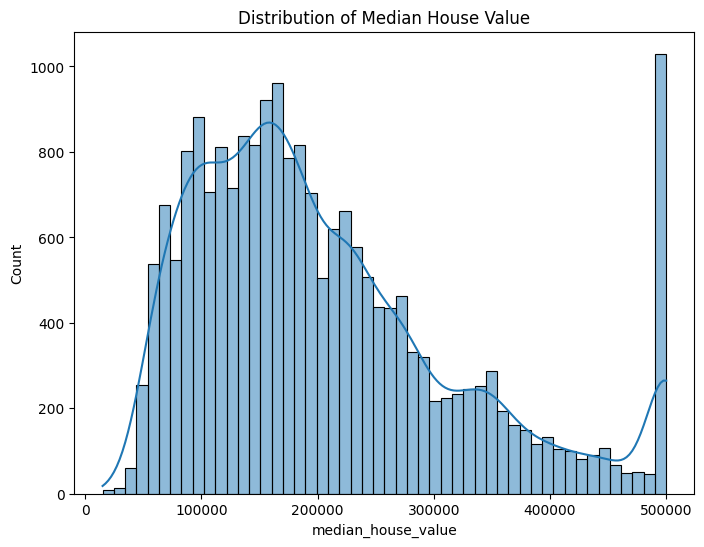

ValueError: could not convert string to float: 'NEAR BAY'

<Figure size 1000x800 with 0 Axes>

In [11]:
# Histogram for target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


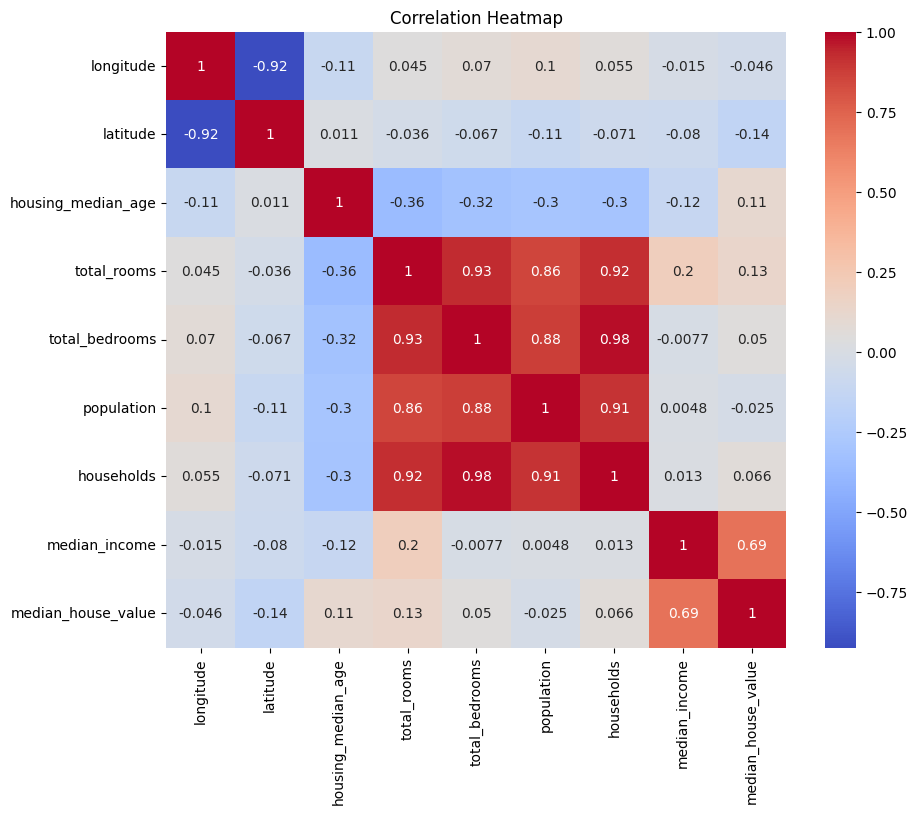

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame
# Select only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=np.number).columns

# Calculate correlation for numerical features
correlation_matrix = df[numerical_features].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Fill missing values in 'total_bedrooms' with the median
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


<ipython-input-13-12fe6b0487f4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


In [14]:
# Replace missing values in 'total_bedrooms' with the median
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())


In [15]:
# Feature engineering
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']


In [16]:
# One-hot encoding for 'ocean_proximity'
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)


In [17]:
# Standardize features
scaler = StandardScaler()
numeric_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room']
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [18]:
# Define X and y
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lr = lr.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R^2:", r2_score(y_test, y_pred_lr))


Linear Regression MSE: 5283016652.013159
Linear Regression R^2: 0.5968421508294983


In [20]:
# Decision Tree Regressor
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train, y_train)

# Predictions and evaluation
y_pred_dtr = dtr.predict(X_test)
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dtr))
print("Decision Tree R^2:", r2_score(y_test, y_pred_dtr))


Decision Tree MSE: 5309425644.00187
Decision Tree R^2: 0.5948268264210711


In [21]:
# Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rfr.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rfr = rfr.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rfr))
print("Random Forest R^2:", r2_score(y_test, y_pred_rfr))


Random Forest MSE: 3024628348.0809813
Random Forest R^2: 0.769184399809191


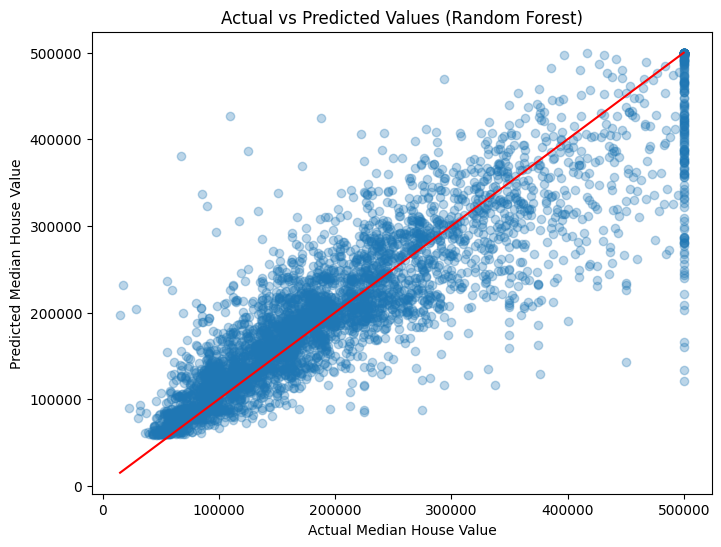

In [22]:
# Comparison plot for Actual vs Predicted for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rfr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Values (Random Forest)")
plt.show()
